## CrossRef Example

**CrossRef - Data Download**

In [1]:
import json, requests
headers={'User-Agent': 'BibExample/0.1 (mailto:info@inforesearch.co.uk)',}
r=requests.get('https://api.crossref.org/works/?query.affiliation=cybermetrics&rows=100',  
     headers=headers)
results=json.loads(r.text)


**CrossRef - Data Transformation and Cleaning**

In [2]:
import networkx as nx
G= nx.Graph()
for paper in results['message']['items']:
    try:
        authorSet = set()
        for author in paper['author']:
            try:
                name=author['family']+", "+author['given']
                G.add_node(name)
                authorSet.add(name)  
            except:
                print ('Error:no family or given name')
        for x in authorSet:
            for y in authorSet:
                if x!=y:
                    G.add_edge(x,y)
    except:
        print ('Error:no author')


In [3]:
G=nx.contracted_nodes(G, 'Buckley, K.', 'Buckley, Kevan', self_loops=False)
G=nx.contracted_nodes(G, 'Hołyst, J.', 'Hołyst, J.A.', self_loops=False)
G=nx.contracted_nodes(G, 'Thelwall, M.', 'Thelwall, Mike', self_loops=False)
G=nx.contracted_nodes(G, 'Thelwall, M.', 'THELWALL, MIKE', self_loops=False)
G=nx.contracted_nodes(G, 'Thelwall, M.', 'Thelwall, Michael', self_loops=False)

In [4]:
largest_cc = max(nx.connected_component_subgraphs(G), key=len)

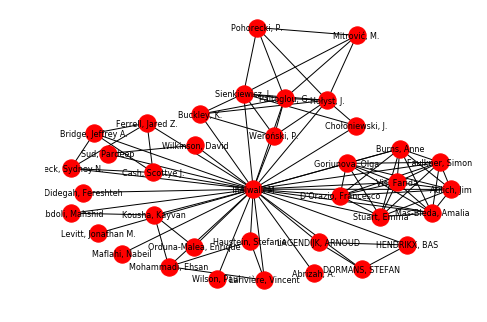

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
pos=nx.kamada_kawai_layout(largest_cc)
nx.draw (largest_cc, pos)
nx.draw_networkx_labels(largest_cc, pos, font_size=8)
plt.show(largest_cc)


 **Centrality Analysis with NetworkX**

In [6]:
sorted(nx.degree_centrality(largest_cc).items(), key=lambda x: x[1], reverse=True)

[('Thelwall, M.', 0.9444444444444444),
 ('Aulich, Jim', 0.2222222222222222),
 ('Faulkner, Simon', 0.2222222222222222),
 ('Vis, Farida', 0.2222222222222222),
 ('Burns, Anne', 0.2222222222222222),
 ('Stuart, Emma', 0.2222222222222222),
 ('Hołyst, J.', 0.2222222222222222),
 ('Goriunova, Olga', 0.2222222222222222),
 ('Sienkiewicz, J.', 0.2222222222222222),
 ("D'Orazio, Francesco", 0.2222222222222222),
 ('Mas-Bleda, Amalia', 0.2222222222222222),
 ('Paltoglou, G.', 0.19444444444444442),
 ('Weroński, P.', 0.1388888888888889),
 ('Buckley, K.', 0.1388888888888889),
 ('Cash, Scottye J.', 0.1111111111111111),
 ('Kousha, Kayvan', 0.1111111111111111),
 ('Peck, Sydney N.', 0.1111111111111111),
 ('Mohammadi, Ehsan', 0.1111111111111111),
 ('Bridge, Jeffrey A.', 0.1111111111111111),
 ('Pohorecki, P.', 0.1111111111111111),
 ('Mitrović, M.', 0.1111111111111111),
 ('Ferrell, Jared Z.', 0.1111111111111111),
 ('Chołoniewski, J.', 0.08333333333333333),
 ('LAGENDIJK, ARNOUD', 0.08333333333333333),
 ('Haustein

**Cliques in NetworkX**

In [7]:
#Largest clique for each node
nx.node_clique_number(largest_cc)

{'Abdoli, Mahshid': 3,
 'Abrizah, A.': 2,
 'Aulich, Jim': 9,
 'Bridge, Jeffrey A.': 5,
 'Buckley, K.': 6,
 'Burns, Anne': 9,
 'Cash, Scottye J.': 5,
 'Chołoniewski, J.': 4,
 "D'Orazio, Francesco": 9,
 'DORMANS, STEFAN': 4,
 'Didegah, Fereshteh': 2,
 'Faulkner, Simon': 9,
 'Ferrell, Jared Z.': 5,
 'Goriunova, Olga': 9,
 'HENDRIKX, BAS': 4,
 'Haustein, Stefanie': 4,
 'Hołyst, J.': 6,
 'Kousha, Kayvan': 3,
 'LAGENDIJK, ARNOUD': 4,
 'Larivière, Vincent': 4,
 'Levitt, Jonathan M.': 2,
 'Maflahi, Nabeil': 2,
 'Mas-Bleda, Amalia': 9,
 'Mitrović, M.': 5,
 'Mohammadi, Ehsan': 4,
 'Orduna-Malea, Enrique': 3,
 'Paltoglou, G.': 6,
 'Peck, Sydney N.': 5,
 'Pohorecki, P.': 5,
 'Sienkiewicz, J.': 6,
 'Stuart, Emma': 9,
 'Sud, Pardeep': 3,
 'Thelwall, M.': 9,
 'Vis, Farida': 9,
 'Weroński, P.': 6,
 'Wilkinson, David': 3,
 'Wilson, Paul': 2}

In [8]:
#Listing the cliques for each node
nx.cliques_containing_node(largest_cc)

{'Abdoli, Mahshid': [['Thelwall, M.', 'Kousha, Kayvan', 'Abdoli, Mahshid']],
 'Abrizah, A.': [['Thelwall, M.', 'Abrizah, A.']],
 'Aulich, Jim': [['Thelwall, M.',
   'Stuart, Emma',
   'Aulich, Jim',
   'Faulkner, Simon',
   'Goriunova, Olga',
   "D'Orazio, Francesco",
   'Vis, Farida',
   'Mas-Bleda, Amalia',
   'Burns, Anne']],
 'Bridge, Jeffrey A.': [['Thelwall, M.',
   'Bridge, Jeffrey A.',
   'Peck, Sydney N.',
   'Cash, Scottye J.',
   'Ferrell, Jared Z.']],
 'Buckley, K.': [['Thelwall, M.',
   'Hołyst, J.',
   'Sienkiewicz, J.',
   'Paltoglou, G.',
   'Weroński, P.',
   'Buckley, K.']],
 'Burns, Anne': [['Thelwall, M.',
   'Stuart, Emma',
   'Aulich, Jim',
   'Faulkner, Simon',
   'Goriunova, Olga',
   "D'Orazio, Francesco",
   'Vis, Farida',
   'Mas-Bleda, Amalia',
   'Burns, Anne']],
 'Cash, Scottye J.': [['Thelwall, M.',
   'Bridge, Jeffrey A.',
   'Peck, Sydney N.',
   'Cash, Scottye J.',
   'Ferrell, Jared Z.']],
 'Chołoniewski, J.': [['Thelwall, M.',
   'Hołyst, J.',
   'Si

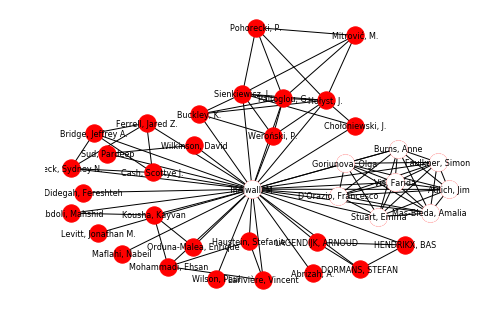

In [9]:
pos=nx.kamada_kawai_layout(largest_cc)
nx.draw (largest_cc, pos)
nx.draw_networkx_labels(largest_cc, pos, font_size=8)
clique_list=nx.cliques_containing_node(largest_cc, 'Stuart, Emma')[0]
nx.draw_networkx_nodes(G,pos, nodelist=clique_list, node_color='w')
plt.show(largest_cc)


## K-Means Clustering in San Francisco Libraries

In [10]:
import pandas as pd
dataDF = pd.read_csv("https://data.sfgov.org/resource/qzz6-2jup.csv") 

In [11]:
ageDic = {'0 to 9 years' : 5,
          '10 to 19 years' : 15,
          '20 to 24 years' : 22,
          '25 to 34 years' : 30,
          '35 to 44 years' : 40,
          '45 to 54 years' : 50,
          '55 to 59 years' : 57,
          '60 to 64 years' : 62,
          '65 to 74 years' : 70,
          '75 years and over' : 80}
dataDF=dataDF.replace({"age_range": ageDic})

subsetdf=dataDF.head(1000)

** Clustering without scaling **

C:\Users\Emma\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


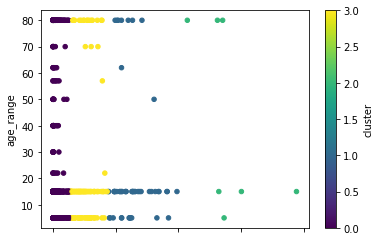

In [14]:
import numpy as np
from sklearn import preprocessing
from sklearn.cluster import KMeans

f1 = subsetdf['total_checkouts'].values
f2 = subsetdf['age_range'].values

X=np.matrix(tuple(zip(f1,f2)))

kmeans = KMeans(n_clusters=4).fit(X)

subsetdf['cluster']=kmeans.labels_
subsetdf.plot.scatter(x='total_checkouts', y='age_range', c='cluster', colormap='viridis')

** Clustering with scaling **

C:\Users\Emma\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)
C:\Users\Emma\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\Emma\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\Emma\Anaconda3\lib\site-packages\sklea

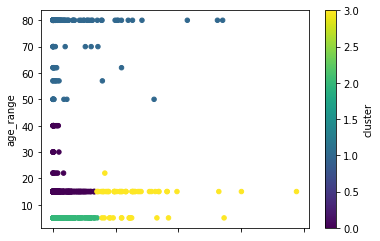

In [17]:
import numpy as np
from sklearn import preprocessing
from sklearn.cluster import KMeans

f1 = preprocessing.MinMaxScaler().fit_transform(subsetdf['total_checkouts'].values)
f2 = preprocessing.MinMaxScaler().fit_transform(subsetdf['age_range'].values)

X=np.matrix(tuple(zip(f1,f2)))

kmeans = KMeans(n_clusters=4).fit(X)

subsetdf['cluster']=kmeans.labels_
subsetdf.plot.scatter(x='total_checkouts', y='age_range', c='cluster', colormap='viridis')

**  The Elbow Method **

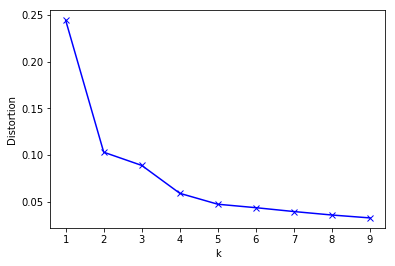

In [18]:
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

distortions = []
for k in range(1,10):
    kmeanModel = KMeans(n_clusters=k).fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

plt.plot(range(1,10), distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.show()